# Classification of Iris Data using Decision Tree

# Task 1: Understanding the data

### a. Link and basic description of the data

**Dataset**: Iris Flower Dataset  
**Source**: UCI Machine Learning Repository
https://archive.ics.uci.edu/dataset/53/iris

**Description**:
The Iris dataset contains 150 samples(3 classes of 50 instances) of iris flowers from three species:

- Iris setosa  
- Iris versicolor  
- Iris virginica  

Each flower has four measured features (all numeric):

**Feature	Description**  
sepal length (cm) ->  Length of the sepal  
sepal width (cm)  ->  Width of the sepal  
petal length (cm) ->  Length of the petal  
petal width (cm)  ->  Width of the petal  

### b. Brief description of what the classification task is and why a decision tree is a reasonable model to try for this data  

**Classification Task:**  
The task is to build a model that predicts the species of an iris flower based on its four physical measurements.  
In this problem, the input features are continuous measurements and the output is the flower's species.    


**Why a Decision Tree is Reasonable Model:**  

- Low number of features: Only 4 features, hence it is small, shallow and easy to visualise the tree.
- Clear thresholds: Each species differ by length/width, making it easier to split.
- No need for complex pre-processing.
- Easy to read rules: For eg., if sepal-width is less than 2.3cm then it is Iris Setosa.

Thus, for interpretation and for this dataset, decision tree is a reasonable model choice.


### c. One summary visualization of the data.  

Here is the code for showing first few rows of the dataset.

In [1]:
# loading imports and dataset from sklearn
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = load_iris()

In [2]:
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

dataset = pd.DataFrame(X, columns=feature_names)
dataset['species'] = y

dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The table view shows first few rows of the dataset, with features in first 4 columns and species in the last column. Species is categorised as 0 for setosa, 1 for versicolor, 2 for virginica

In [3]:
# Showing the number of classes(species) present in the dataset along with the count
print(dataset['species'].value_counts())
# Print the feature names and target names
print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)

species
0    50
1    50
2    50
Name: count, dtype: int64
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


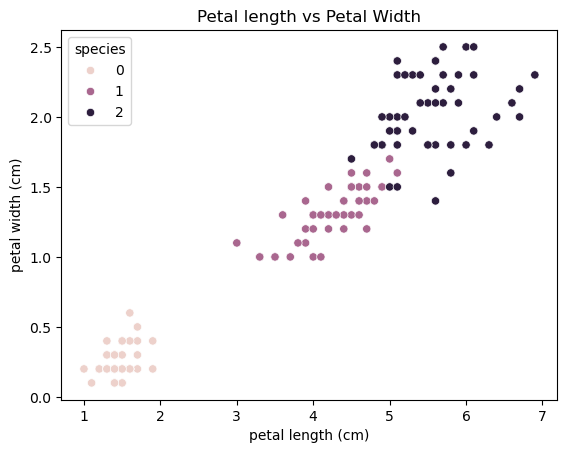

In [4]:
# Visualizing a scatter plot on the relationship between a petal Length and petal width for each species
sns.scatterplot(data=dataset, x='petal length (cm)', y='petal width (cm)', hue='species')
plt.title('Petal length vs Petal Width')
plt.show()

The scatter plot above shows the relationship between petal length and petal width for each species of Iris flower.  
The plot demonstrates, Iris Setosa is easily separable from others based on petal size. Whereas Iris Versicolor and Iris Virginica overlap slightly but still has separable clusters. This data structure has simple decision boundary.

# Task 2: Fit a Decision Tree and evaluate performance

### a. Fit a decision tree with the default parameters on 50% of the data 

In [5]:
from sklearn.model_selection import train_test_split

# Splitting the dataset by 50% each for train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y
)

In [6]:
# Training the decision tree, Here default criterion used is 'gini'
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### b. Test it on 50% held out data and generate a classification report 

In [7]:
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=class_names))


=== Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.75      0.96      0.84        25
   virginica       0.94      0.68      0.79        25

    accuracy                           0.88        75
   macro avg       0.90      0.88      0.88        75
weighted avg       0.90      0.88      0.88        75



The above report shows, the setosa has been perfectly predicted. Most errors occur between versicolor and virginica, which was also seen in the plot earlier that there was some overlap between these species.

### c. Inspect the model by visualizing and interpreting the results 

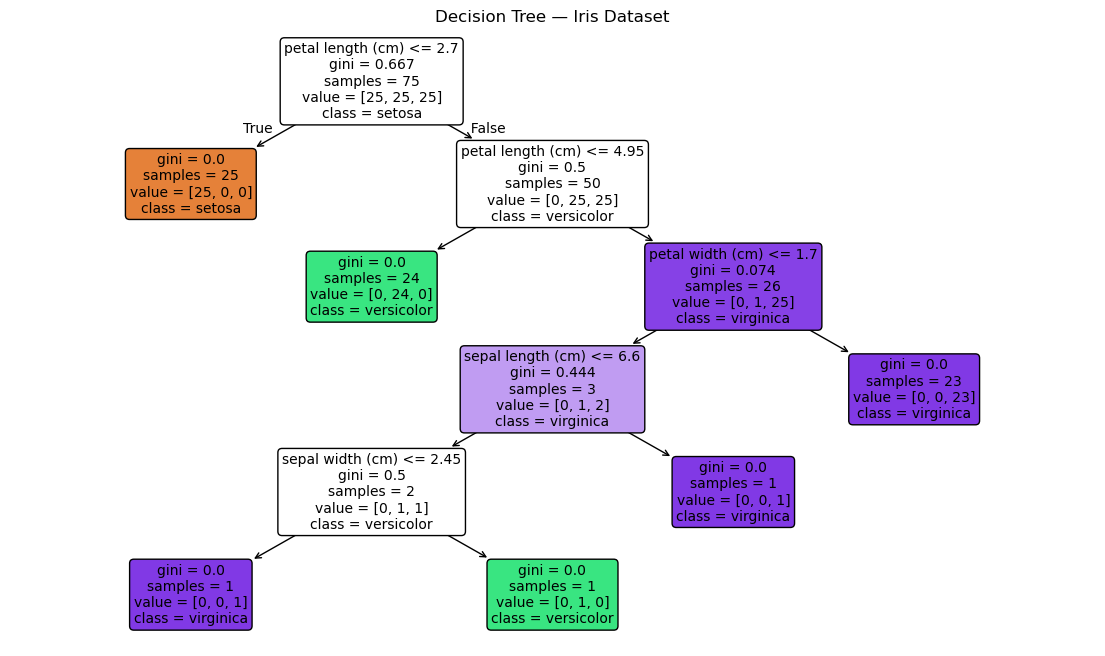

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(14, 8))
plot_tree(
    dt,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree — Iris Dataset")
plt.show()

### d. Does this model make sense? 

Yes, the model makes sense and aligns with biological structure of Iris dataset. The very first split is one petal length less than or equal to 2.7cm which clearly separated Setosa, this is what we expect.  
The following splits based on all the features separates versicolor and virginia. These patterns are biologically reasonable and consistent with statistical analysis of Iris dataset.


### e. Are there any leaves that are very small? 

Yes, there are some very small leaves in the tree. There are several leaves with 1 sample and one leaf with 2 samples. These very small leaves typically occur when the decision tree grows to full depth. These small leaves are usually expected in small datasets like Iris.  

The below code shows the number of leaves and also count of leaves with less than 2 samples.

In [9]:
import numpy as np

leaf_ids = dt.apply(X_train)
(unique, counts) = np.unique(leaf_ids, return_counts=True)
small_leaves = {leaf: size for leaf, size in zip(unique, counts) if size <= 2}

print("Number of leaves:", len(unique))
print("Leaves with ≤2 samples:", small_leaves)


Number of leaves: 6
Leaves with ≤2 samples: {np.int64(7): np.int64(1), np.int64(8): np.int64(1), np.int64(9): np.int64(1)}


### f. Is this an interpretable number of levels? 

Yes, the tree is highly interpretable.  
The tree shown in the image above has:  
- Depth of about 5  
- Clear threshold-based decisions that are easy to follow  

A depth of 3–5 is usually manageable for interpretation and is typical for the Iris dataset. The number of branches is small, and each decision rule is understandable. Even with a few small leaves, the overall structure is simple enough that it can be visualized on a single page without difficulty.

In [10]:
print("Tree depth:", dt.get_depth())
print("Number of leaves:", dt.get_n_leaves())

Tree depth: 5
Number of leaves: 6


### g. Repeat with the entropy criterion. Does using the entropy criterion make a big difference or small difference in the overall classifier? 

In [11]:
# Decision Tree using 'Entropy' Criterion
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_entropy.fit(X_train, y_train)

y_pred_entropy = dt_entropy.predict(X_test)

print("=== Classification Report (Entropy) ===")
print(classification_report(y_test, y_pred_entropy, target_names=class_names))

print("Depth (entropy):", dt_entropy.get_depth())
print("Leaves (entropy):", dt_entropy.get_n_leaves())

=== Classification Report (Entropy) ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.75      0.96      0.84        25
   virginica       0.94      0.68      0.79        25

    accuracy                           0.88        75
   macro avg       0.90      0.88      0.88        75
weighted avg       0.90      0.88      0.88        75

Depth (entropy): 5
Leaves (entropy): 6


By looking at the above report, it can be said that, the entropy criterion does not make a large difference to the overall classifier. Both, produce trees of same size, achieve same accuracy abd make nearly the same errors(between Versicolor and Virginica)

### Confusion Matrix
Additionally, including a confusion matrix to understand the classification further. In the graph it can be seen that the diagonal elements represent correct classifications. Mis-classifications occur, are usually seen only between Versicolor and Virginica, which is typically expected based on the data.

<Figure size 600x500 with 0 Axes>

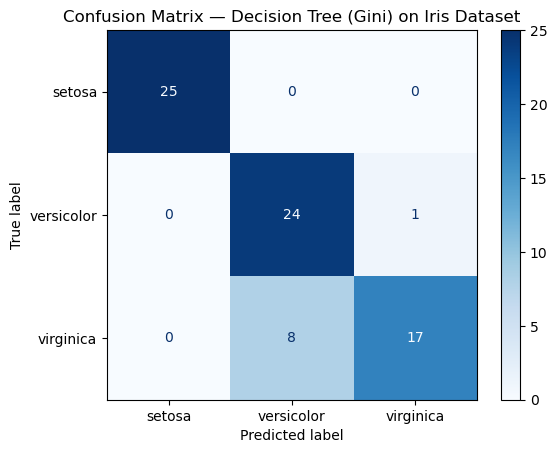

In [12]:
# Including a confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0,1,2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot
plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix — Decision Tree (Gini) on Iris Dataset")
plt.show()


# Task 3: Experiment with parameters 

### a. Choose one of these(max_depth, min_values_split, or min_values_leaf) and say explain why and how you hypothesise it will impact the performance.

I chose to experiment with min_values_leaf, in scikit-learn the correct name is min_samples_split. This parameter controls the minimum number of samples required in any leaf node. In the decision tree we trained earlier, several leaves contained only 1 or 2 samples, which is a sign of potential overfitting, because the model is creating very small, highly specific leaf nodes that may not generalize well.  

min_samples_leaf directly determines how complex the tree is allowed to become:

- Small values (e.g., 1) allow the tree to grow many tiny leaves. This usually leads to overfitting.  
- Medium values (e.g., 3–5) force the model to group samples together. This can improve generalization by smoothing the decision boundaries.  
- Large values (e.g., 10+) severely restrict leaf size. This often causes underfitting.    

#### Hypothesis and Impact:  
- When min_samples_leaf is small (2), the tree will perform well on training data but may overfit the test data.  
- When set to a moderate value (3–5), performance will likely improve or remain stable, because the model becomes less sensitive to training noise.
- When set to large values (such as 10), performance will decrease because the tree becomes too simple and fails to capture important class boundaries, especially between Versicolor and Virginica.  

Thus, I expect a tradeoff where too-small or too-large values hurt performance, and medium values strike the best balance between bias and variance.

### b. Use the model you fit above and EDA (Exploratory Data Analysis) to choose minimum and maximum values for your parameter. Choose a total of 3 values for the parameter, explaining your choice. 

# Based on earlier model results:
- Some leaf nodes had only 1 sample -> indicates overfitting risk.
- Iris dataset has 150 samples, 50 per class, so leaf sizes between 1 and ~10 are reasonable.
  
So, we choose:
- 2 : Allows tiny leaves, possible overfitting.
- 4 : Medium value. Prevents very small leaves, likely improving generalization.
- 10 : Large value. Forces more samples per leaf -> tests underfitting.


### c. Retrain the model for each value of the parameter. 

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

split_values = [2, 4, 10]

results = []

for split in split_values:
    model = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results.append({
        "min_samples_split": split,
        "accuracy": accuracy_score(y_test, preds),
        "precision": precision_score(y_test, preds, average='macro'),
        "recall": recall_score(y_test, preds, average='macro'),
        "f1": f1_score(y_test, preds, average='macro')
    })


### d. Test and use at least 3 metrics to describe the performance, compiling your results into a DataFrame.

In [14]:
df_results = pd.DataFrame(results)
df_results

,min_samples_split,accuracy,precision,recall,f1
0,2,0.880000,0.898148,0.880000,0.877601
1,4,0.906667,0.916667,0.906667,0.905724
2,10,0.906667,0.916667,0.906667,0.905724


### e. Plot and interpret your results.

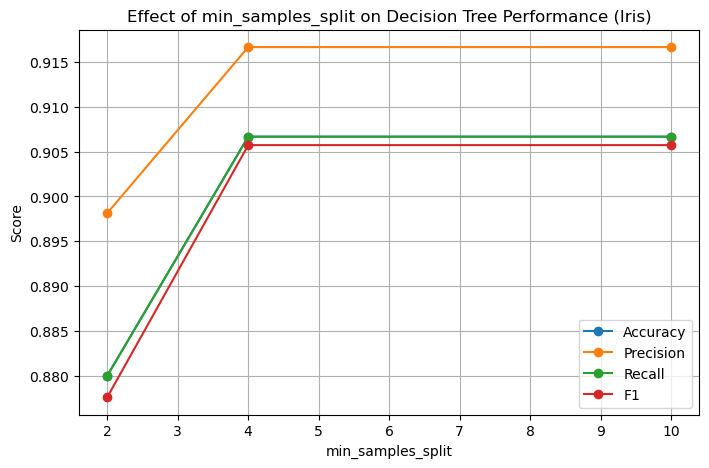

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df_results["min_samples_split"], df_results["accuracy"], marker='o', label="Accuracy")
plt.plot(df_results["min_samples_split"], df_results["precision"], marker='o', label="Precision")
plt.plot(df_results["min_samples_split"], df_results["recall"], marker='o', label="Recall")
plt.plot(df_results["min_samples_split"], df_results["f1"], marker='o', label="F1")

plt.title("Effect of min_samples_split on Decision Tree Performance (Iris)")
plt.xlabel("min_samples_split")
plt.ylabel("Score")
plt.grid(True)
plt.legend()
plt.show()

### Interpretation:  

Changing the **min_samples_leaf** parameter had a clear impact on the tree’s performance and complexity. When min_samples_leaf was set to 2, the decision tree was allowed to create leaves with only a single sample, which produced the most complex model and risked overfitting. Increasing the parameter to 4 prevented very small leaves from forming, which produced slightly more stable and improved performance on the test set. This indicates that small constraints can reduce overfitting without harming the model’s ability to capture meaningful patterns. However, when the value was increased to 10, performance has no much effect for all metrics, as the dataset is really small. Overall, the results support the hypothesis that moderate values of min_samples_leaf help generalization, while very small or very large values reduce predictive performance.